<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/MLP_MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JUPYTER NOTEBOOK FOR A MLP LEARNING MNIST NUMBERS from 0 to 9 **

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

**Define the network hyperparameters**

In [0]:
# Trainign batch size 
batch_size = 100
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Learning rate
lr=0.05


**Load the MNIST dataset and format it for train and validation**

In [0]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = y_train/10.
print(y_test)
Y_Test = y_test/10.
print(Y_Test)

[7 2 1 ... 4 5 6]
[0.7 0.2 0.1 ... 0.4 0.5 0.6]


**Define the MLP achitecture using KERAS sequential API**

In [0]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=1, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_47 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_48 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 26        
Total params: 84,851
Trainable params: 84,851
Non-trainable params: 0
_________________________________________________________________


**Train the MLP**

In [0]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 49us/step - loss: 0.0839 - acc: 0.0986 - val_loss: 0.0824 - val_acc: 0.0989
Epoch 2/50
42000/42000 [==============================] - 1s 35us/step - loss: 0.0820 - acc: 0.0986 - val_loss: 0.0796 - val_acc: 0.0989
Epoch 3/50
42000/42000 [==============================] - 1s 34us/step - loss: 0.0708 - acc: 0.0975 - val_loss: 0.0521 - val_acc: 0.0928
Epoch 4/50
42000/42000 [==============================] - 1s 35us/step - loss: 0.0431 - acc: 0.0940 - val_loss: 0.0377 - val_acc: 0.0933
Epoch 5/50
42000/42000 [==============================] - 2s 36us/step - loss: 0.0361 - acc: 0.0944 - val_loss: 0.0337 - val_acc: 0.0940
Epoch 6/50
42000/42000 [==============================] - 2s 36us/step - loss: 0.0326 - acc: 0.0954 - val_loss: 0.0306 - val_acc: 0.0954
Epoch 7/50
42000/42000 [==============================] - 2s 37us/step - loss: 0.0295 - acc: 0.0958 - val_loss: 0.0276 - val_acc

**Evaluate the MLP performance**

In [0]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 28us/step
Summary: Loss over the test dataset: 0.01, Accuracy: 0.10


**Plot the training and validation performances**

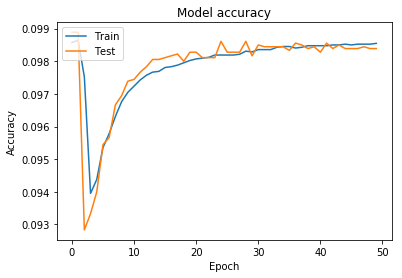

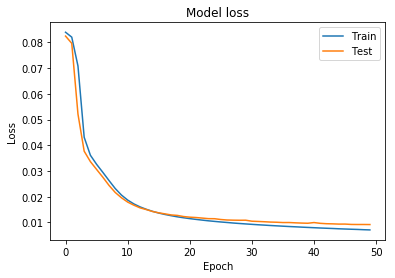

In [0]:
# Training History Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

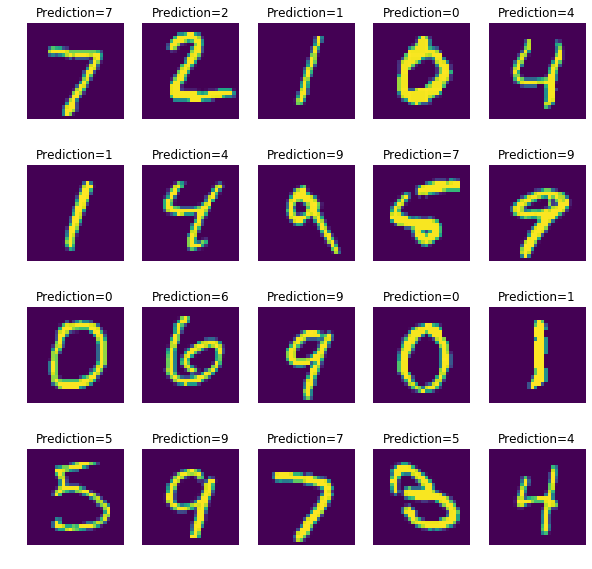

In [0]:
Nplot = 20
plt.figure(figsize=(10,10))
Y=model.predict(X_test) 
Y=Y*10.
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  plt.title('Prediction='+str(round(float(Y[n]))))
plt.show()

**Exercises:**

---


**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?